<a href="https://colab.research.google.com/github/sapna-90/Project_6_Pharmaceuticals-sales-prediction/blob/main/Pharmaceuticals_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logging

In [1]:
import logging
logger = logging.getLogger('my_logger')

In [2]:
logger.setLevel(logging.INFO)

In [3]:
# Handler
console_handler = logging.StreamHandler()
file_handler = logging.FileHandler('app.log')
logger.addHandler(console_handler)
logger.addHandler(file_handler)

In [4]:
# Formatter
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

In [5]:
# Log messages at different levels
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('this is an error message')
logger.critical('THis is a critical message')

2024-11-03 16:34:54,037 - INFO - This is an info message
INFO:my_logger:This is an info message
2024-11-03 16:34:54,047 - WARNING - This is a warning message
2024-11-03 16:34:54,054 - ERROR - this is an error message
ERROR:my_logger:this is an error message
2024-11-03 16:34:54,057 - CRITICAL - THis is a critical message
CRITICAL:my_logger:THis is a critical message


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
Traindata = pd.read_csv(r"/content/train.csv")
Storedata = pd.read_csv(r"/content/store.csv")

Merge train and store data

In [8]:
Merged_data = pd.merge(Traindata, Storedata, on='Store', how='left')

Exploratory Data Analysis for Mergedata

In [9]:
Merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392140 entries, 0 to 392139
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      392140 non-null  int64  
 1   DayOfWeek                  392140 non-null  int64  
 2   Date                       392139 non-null  object 
 3   Sales                      392139 non-null  float64
 4   Customers                  392139 non-null  float64
 5   Open                       392139 non-null  float64
 6   Promo                      392139 non-null  float64
 7   StateHoliday               392139 non-null  object 
 8   SchoolHoliday              392139 non-null  float64
 9   StoreType                  392140 non-null  object 
 10  Assortment                 392140 non-null  object 
 11  CompetitionDistance        391170 non-null  float64
 12  CompetitionOpenSinceMonth  267285 non-null  float64
 13  CompetitionOpenSinceYear   26

In [11]:
Merged_data.isnull().sum().sort_values(ascending=False)

,0
PromoInterval,201956
Promo2SinceYear,201956
Promo2SinceWeek,201956
CompetitionOpenSinceMonth,124855
CompetitionOpenSinceYear,124855
CompetitionDistance,970
Date,1
Sales,1
Customers,1
Open,1


In [12]:
numerical_cols = Merged_data.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each numerical column and fill missing values
for col in numerical_cols:
    Merged_data[col] = Merged_data[col].fillna(Merged_data[col].mean(0))

In [13]:
categorical_cols = Merged_data.select_dtypes(include=['object']).columns

# Iterate through each numerical column and fill missing values
for col in categorical_cols:
    Merged_data[col] = Merged_data[col].fillna(Merged_data[col].mode(0))

In [14]:
Merged_data.isnull().sum().sort_values(ascending=False)

,0
PromoInterval,201956
Date,1
StateHoliday,1
Assortment,0
Promo2SinceYear,0
Promo2SinceWeek,0
Promo2,0
CompetitionOpenSinceYear,0
CompetitionOpenSinceMonth,0
CompetitionDistance,0


In [15]:
Merged_data['PromoInterval'].ffill(inplace=True)
Merged_data['PromoInterval'].bfill(inplace=True)

In [16]:
Merged_data.isnull().sum().sort_values(ascending=False)

,0
Date,1
StateHoliday,1
Store,0
Assortment,0
Promo2SinceYear,0
Promo2SinceWeek,0
Promo2,0
CompetitionOpenSinceYear,0
CompetitionOpenSinceMonth,0
CompetitionDistance,0


In [17]:
Merged_data.duplicated().sum()

0

In [18]:
numerical_cols = Merged_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = Merged_data.select_dtypes(include=['object']).columns

In [19]:
# Create the list of numerical data
numerical_data=[]
for i in Merged_data.columns:
  if Merged_data[i].dtype!='object':
    numerical_data.append(i)
numerical_data

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [20]:
## now to create a list of categorical data
categorical_data=[]
for i in Merged_data.columns:
  if Merged_data[i].dtype=='object':
    categorical_data.append(i)
categorical_data

['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

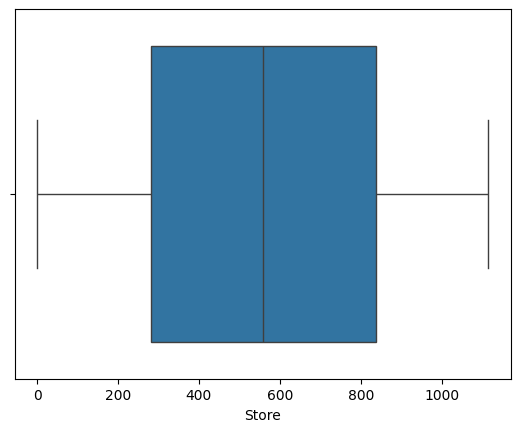

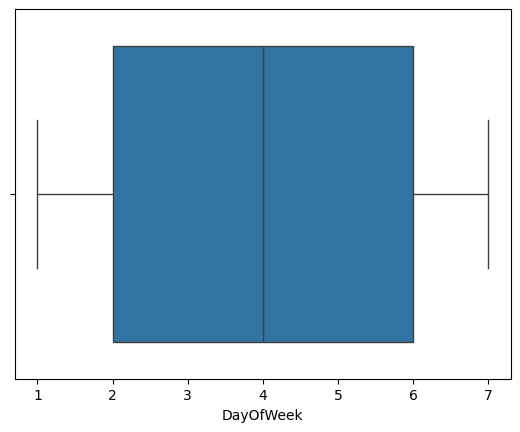

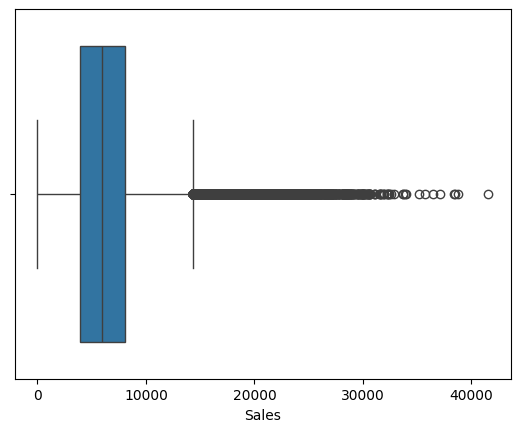

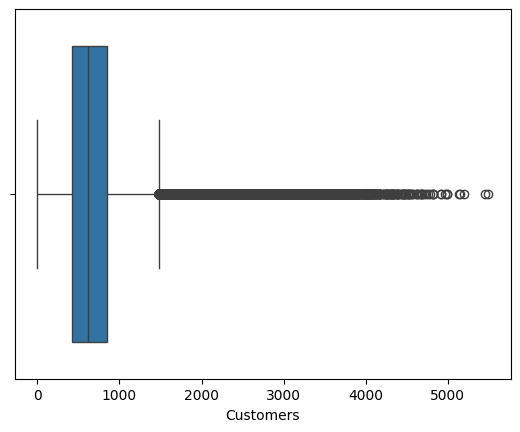

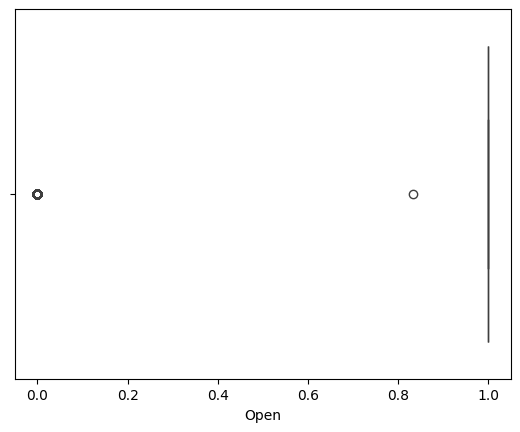

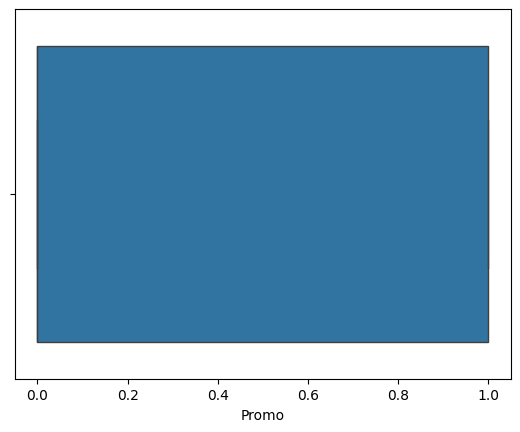

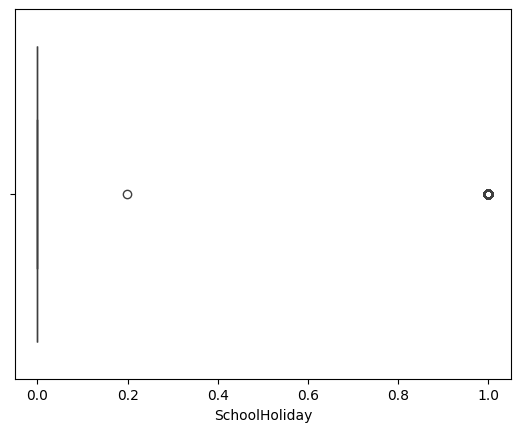

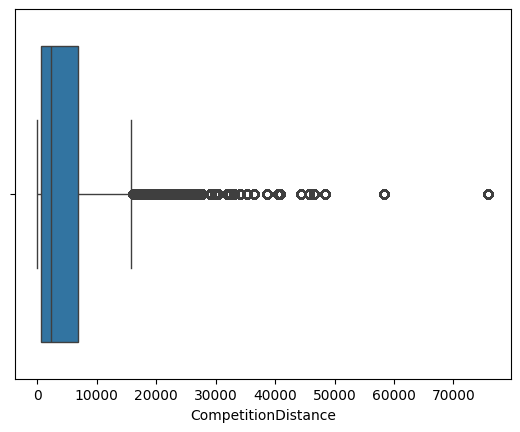

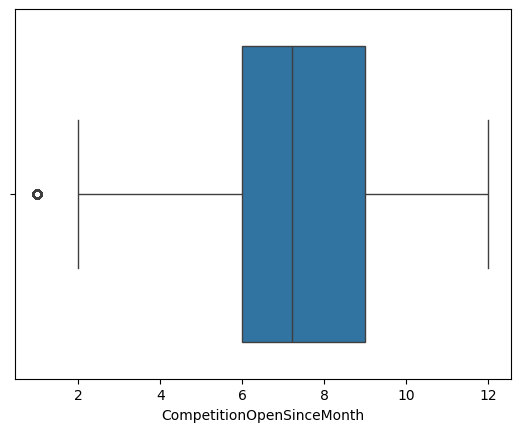

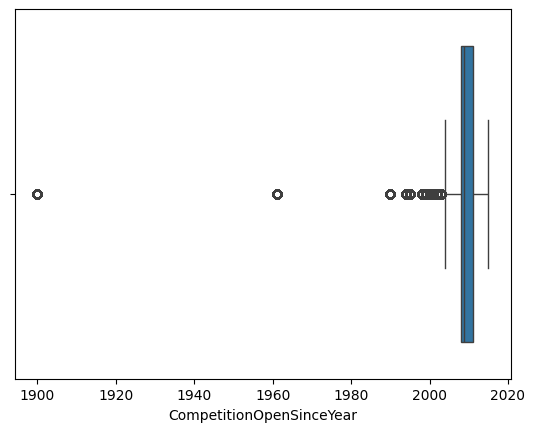

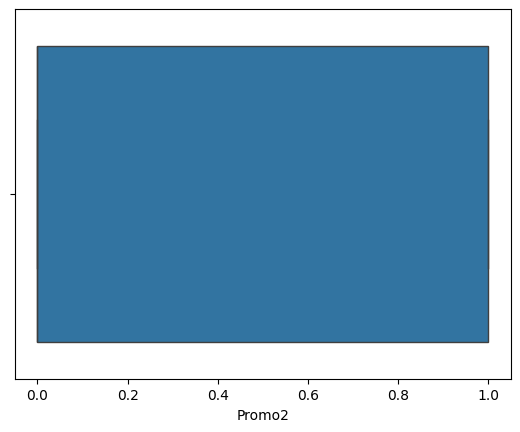

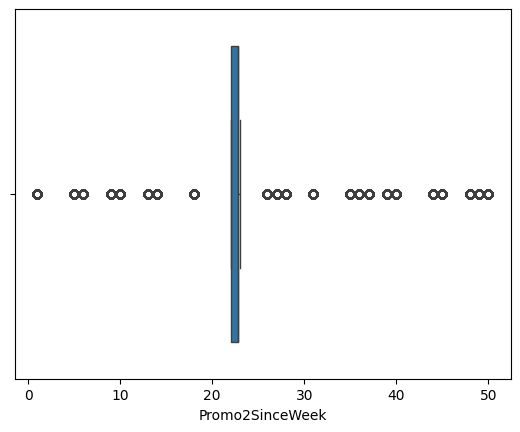

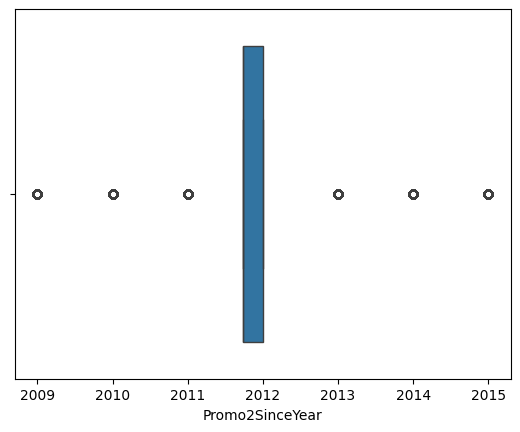

In [21]:
for i in numerical_data:
  sns.boxplot(x=i,data=Merged_data)
  plt.show()

In [22]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define the lower and upper bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows that have outliers in the current column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [23]:
Merged_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [24]:
columns_to_check = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear' ]

In [25]:
cleaned_data = remove_outliers(Merged_data, columns_to_check)

In [26]:
print("Data shape before removing outliers:", Merged_data.shape)
print("Data shape after removing outliers:", cleaned_data.shape)

Data shape before removing outliers: (392140, 18)
Data shape after removing outliers: (152880, 18)


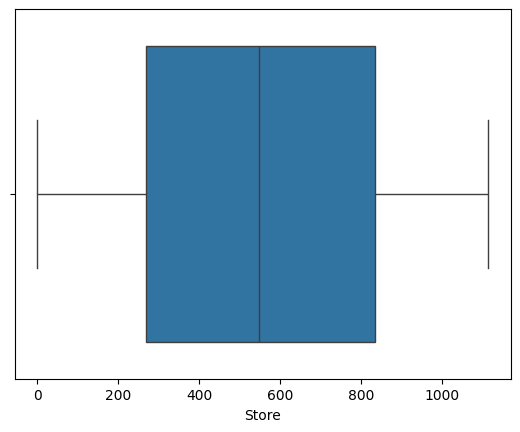

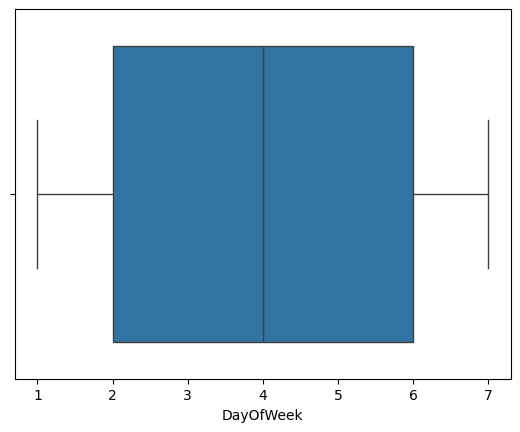

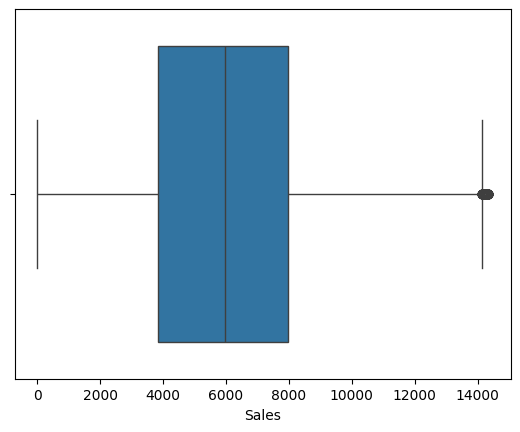

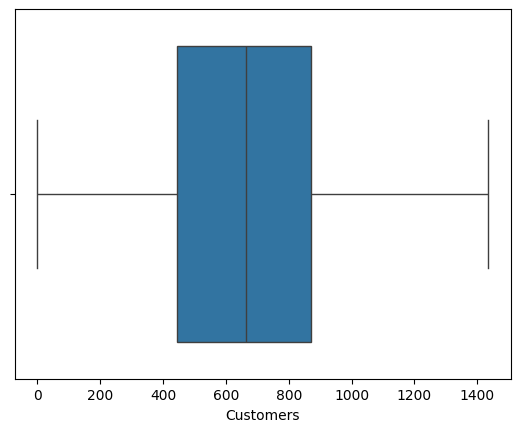

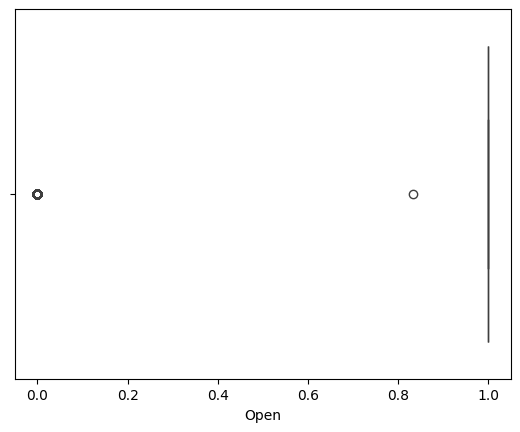

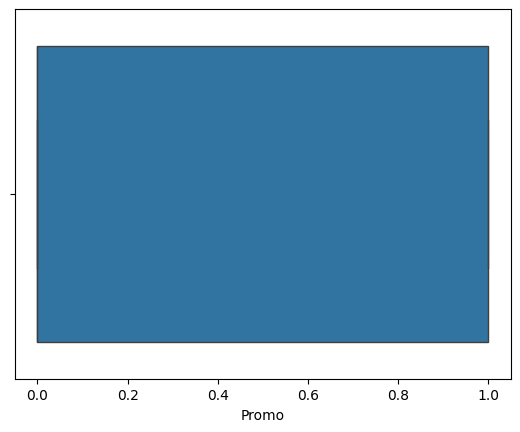

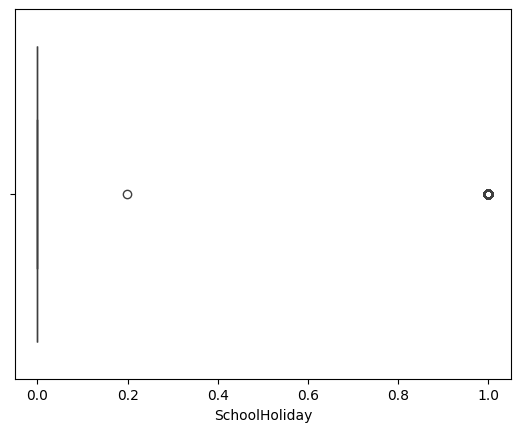

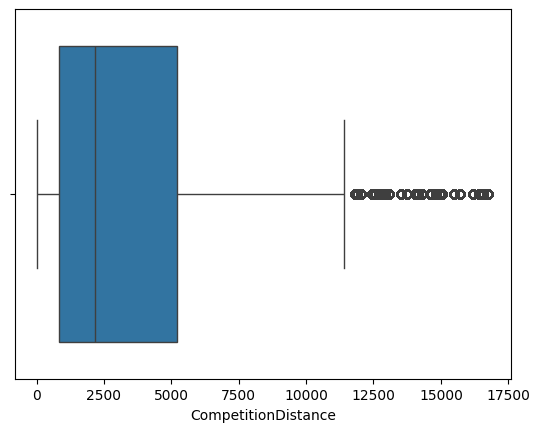

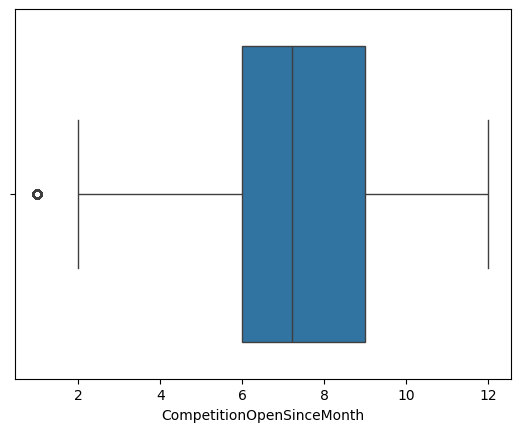

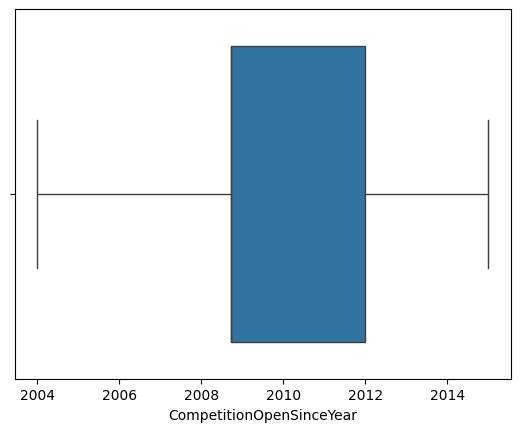

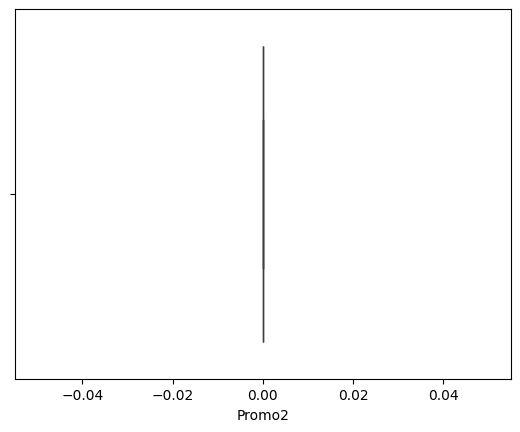

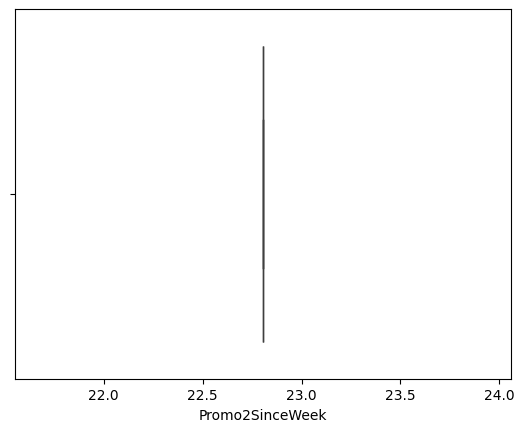

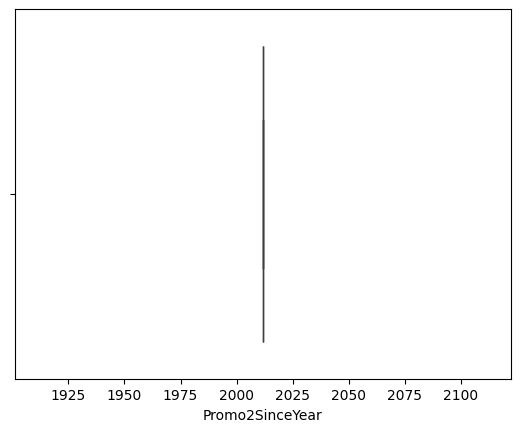

In [27]:
for i in numerical_data:
  sns.boxplot(x=i,data=cleaned_data)
  plt.show()

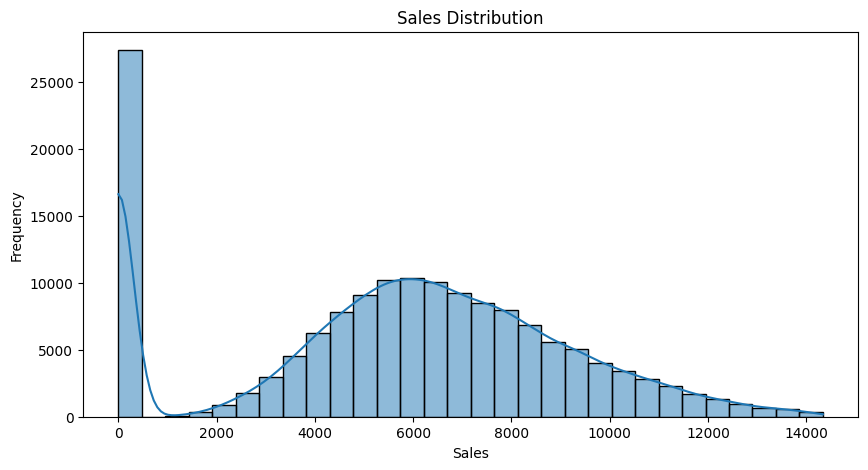

In [28]:
# Distribution of Sales
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data['Sales'], kde=True, bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [29]:
cleaned_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

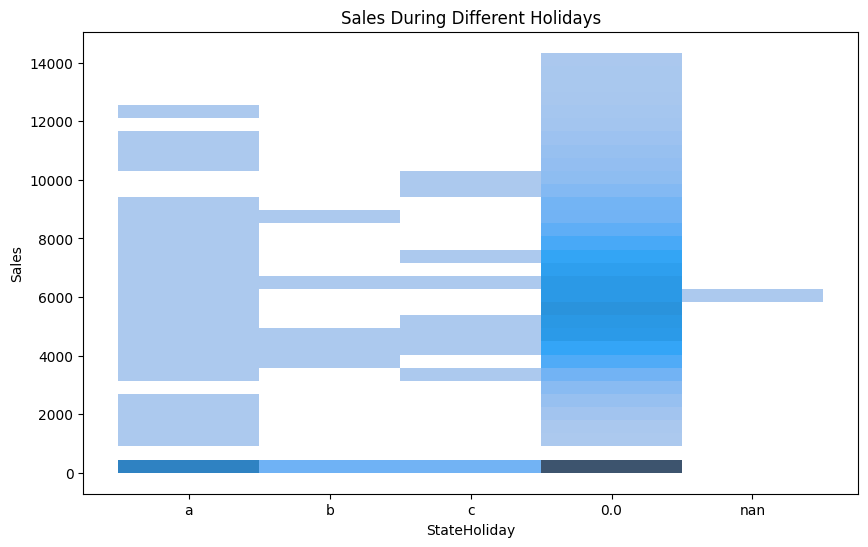

In [30]:
# Sales behavior around holidays
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
cleaned_data['DayOfWeek'] = cleaned_data['Date'].dt.dayofweek
holiday_sales = cleaned_data[cleaned_data['StateHoliday'] != '0']
plt.figure(figsize=(10, 6))
sns.histplot(x=holiday_sales['StateHoliday'].astype(str), y='Sales', data=holiday_sales)
plt.title("Sales During Different Holidays")
plt.show()

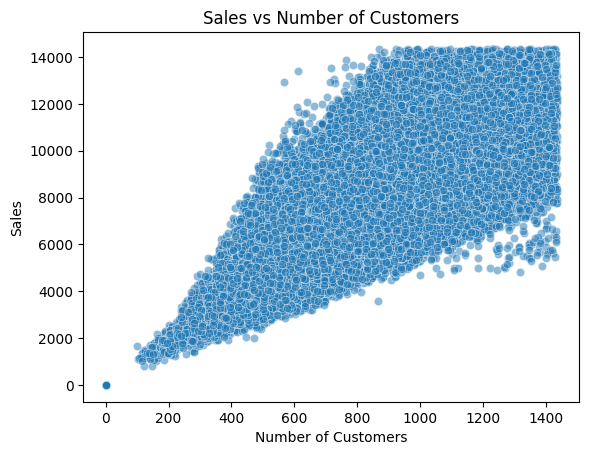

In [31]:
# Sales correlation with customers
sns.scatterplot(x='Customers', y='Sales', data=cleaned_data, alpha=0.5)
plt.title("Sales vs Number of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Sales")
plt.show()

In [32]:
cleaned_data.to_csv('Project_6.csv', index=False)